Topics covered:
- LinearRegression
- PolynomialFeatures
- Ridge
- MinMaxScaler
- Lasso
- SVM (Support Vector Machines), SVR (Support Vector Regressor)
- GridSearchCV
- Regularization
- DecisionTreeRegressor
- Tips for when having overfitting and underfitting:

GridSearchCV:
It is a must use, it serves two purposes
1. you are able to run a set of multiple models with different parameters. After it gets run, it prints out the detailed results so you can select the best model.
2. for every run (parameter) it will split the training set into a second training set and a cross validation set, and will do multiple runs alternating the training set and cross validation set (see Kfold). This part is controlled by the parameter 'cv'.
For example let's say we are going to run a GridSearchCV on a SVR (Support Vector Machine Regressor) with C = [1,10], and cv = 3.
GridSearchCV will run 6 times, 3 times with a C = 1, and 3 times with a C = 10. Now for each C, it will split the training set in 3 random sets (cv parameter), let's call them group A, B and C. The first time it will use A and B as training and C to validate, the next time it will use A and C for training and B for validating, the last time it will use B and C for training and A for validating. The mean of the three runs is the final score for each C.
The default cv in scikit is 3, but it is common to use a cv=5 or cv=10.
The drawback is that for a large cv, it may take a while to run if we have multiple parameters and a large dataset.

When having overfitting (high variance), the model is not a good predictor, here is what to do:
- get more training examples
- reduce the number of features (but don't use PCA to reduce the number of features)
- just adding features is likely going to make things worse
- Increase the regularization parameter (in e.g. Lasso and Ridge is called alpha parameter)
- If using SVMs (SVR or SVC) decrease C (because C = 1/(regularization parameter))

When having underfitting (high bias), the model is too simple, here is what to do:
- get more features
- add polynomial terms
- just getting more training examples is not going to help
- Decrease the regularization parameter (in e.g. Lasso and Ridge is called alpha parameter)
- If using SVMs (SVR or SVC) increase C (because C = 1/(regularization parameter))

What is regularization used for?
- In lay terms, we use regularization when we have many features, but we want to reduce the magnitude of their influence in the final model.
- The other option is just dropping those features altogether.


From the crime dataset found here
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized


below are the columns from the dataset:

predictive_columns = ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumKidsBornNeverMar' 'PctKidsBornNeverMar' 'NumImmig'
 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10'
 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous'
 'PersPerRentOccHous' 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR'
 'MedNumBR' 'HousVacant' 'PctHousOccup' 'PctHousOwnOcc' 'PctVacantBoarded'
 'PctVacMore6Mos' 'MedYrHousBuilt' 'PctHousNoPhone' 'PctWOFullPlumb'
 'OwnOccLowQuart' 'OwnOccMedVal' 'OwnOccHiQuart' 'OwnOccQrange' 'RentLowQ'
 'RentMedian' 'RentHighQ' 'RentQrange' 'MedRent' 'MedRentPctHousInc'
 'MedOwnCostPctInc' 'MedOwnCostPctIncNoMtg' 'NumInShelters' 'NumStreet'
 'PctForeignBorn' 'PctBornSameState' 'PctSameHouse85' 'PctSameCity85'
 'PctSameState85' 'LemasSwornFT' 'LemasSwFTPerPop' 'LemasSwFTFieldOps'
 'LemasSwFTFieldPerPop' 'LemasTotalReq' 'LemasTotReqPerPop'
 'PolicReqPerOffic' 'PolicPerPop' 'RacialMatchCommPol' 'PctPolicWhite'
 'PctPolicBlack' 'PctPolicHisp' 'PctPolicAsian' 'PctPolicMinor'
 'OfficAssgnDrugUnits' 'NumKindsDrugsSeiz' 'PolicAveOTWorked' 'LandArea'
 'PopDens' 'PctUsePubTrans' 'PolicCars' 'PolicOperBudg'
 'LemasPctPolicOnPatr' 'LemasGangUnitDeploy' 'LemasPctOfficDrugUn'
 'PolicBudgPerPop']
 
 
 target_columns:['murders' 'murdPerPop' 'rapes' 'rapesPerPop' 'robberies'
 'robbbPerPop' 'assaults' 'assaultPerPop' 'burglaries' 'burglPerPop'
 'larcenies' 'larcPerPop' 'autoTheft' 'autoTheftPerPop' 'arsons'
 'arsonsPerPop' 'ViolentCrimesPerPop' 'nonViolPerPop']

In [1]:
def get_crime_dataset():
    import pandas as pd
    # Communities and Crime dataset for regression
    # source:
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    df = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    
    # drop columns for city, state, etc. plus rows with values = na
    crime = df.drop(df.columns[[0,1,2,3,4]],axis=1).dropna()
    
    # n columns based on the index
#     X_crime = crime.iloc[:,range(0,10)]
    
    # all predictive columns
#     X_crime = crime.iloc[:,range(0,124)]

    # select columns from a list
    X_crime = crime[['PctPopUnderPov','racepctblack','racePctWhite','racePctAsian',
 'racePctHisp','population','medIncome','PctKidsBornNeverMar']]
    
    # select just one column, will need to do a reshape
#     X_crime = crime['perCapInc'].values.reshape(-1,1)
    
    #your exercise here
#     X_crime = crime[[]]

    # select any one column from the target columns
    y_crime = crime['burglPerPop']

    return (X_crime,y_crime)

In [ ]:
def printDataSet():
    (X_crime,y_crime) = get_crime_dataset()
    print(X_crime.head())
    print(y_crime.head())
    
printDataSet()

In [ ]:
def returnColumnNames():
    (X_crime,y_crime) = get_crime_dataset()
    print('X: ', X_crime.columns.values, '\ny: ',y_crime.name)
    
returnColumnNames()
    

In [ ]:
#let's get a baseset with a dummy regressor

def ex0():
    import warnings
    warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
    import numpy as np
    from sklearn.dummy import DummyRegressor
    from sklearn.model_selection import train_test_split
    
    (X_crime,y_crime) = get_crime_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
    dummy = DummyRegressor().fit(X_train, y_train)

    #linreg.score gives the R2 score
    return (dummy.score(X_train, y_train),dummy.score(X_test, y_test))

ex0()

In [ ]:
#perform linear regression

def ex1():
    import warnings
    warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    
    (X_crime,y_crime) = get_crime_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)

    #linreg.score gives the R2 score
    return (linreg.score(X_train, y_train),linreg.score(X_test, y_test))

ex1()

In [ ]:
# perform polynomial regression of degree 2, which in theory should give us better score
# reality was different, we are now overfitting
def ex1a():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    
    (X_crime,y_crime) = get_crime_dataset()
    
    X_poly = PolynomialFeatures(degree=2).fit_transform(X_crime)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_crime,
                                                   random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)

    return (linreg.score(X_train, y_train),linreg.score(X_test, y_test))

ex1a()

In [ ]:
# to avoid the problems of overfitting polynomial regression of higher degrees, 
# we put a penalty on the coefficients that are large.
# We use ridge regression which is a type of regularized linear regression 
# that uses an alpha parameter that helps to avoid overfitting: 
def ex2():
    
    import numpy as np
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    
    (X_crime,y_crime) = get_crime_dataset()
    
    X_poly = PolynomialFeatures(degree=2).fit_transform(X_crime)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_crime,
                                                   random_state = 0)
    linridge = Ridge(alpha=20.0).fit(X_train, y_train)

    return (linridge.score(X_train, y_train),linridge.score(X_test, y_test))

ex2()

In [2]:
# when features vary wildly, 
# e.g when calculating the price of the house: 
# the square footage is in the thousands
# and number of bedrooms is in the single digits, it's best to normalize the data 
# MinMaxScaler will convert values to between 0 and 1 (for all positive values) 
# or -.5 and .5 (for positive and negative values)
# make sure there are no outliers
def ex2a():
    
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    
    scaler = MinMaxScaler()
    (X_crime,y_crime) = get_crime_dataset()
    X_poly = PolynomialFeatures(degree=3).fit_transform(X_crime)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_crime,
                                                   random_state = 0)
    # both training set and testing set need to be scaled
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

    return (linridge.score(X_train_scaled, y_train),linridge.score(X_test_scaled, y_test))

ex2a()

(0.53526522806995325, 0.48953144501529067)

In [ ]:
# exercise: use min max scaler and ridge regressor with alpha values in 
# [0.1, 1, 10, 20, 50, 100, 1000] with a polynomial of degree 3
# notice that increasing alpha reduces overfitting
def ex3():

    import warnings
    warnings.filterwarnings(action="ignore", module="scipy")
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import Ridge
    import numpy as np
    
    scaler = MinMaxScaler()
    (X_crime,y_crime) = get_crime_dataset()
    X_poly = PolynomialFeatures(degree=3).fit_transform(X_crime)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_crime,
                                                       random_state = 0)

    # both training set and testing set need to be scaled
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for this_alpha in [0.1, 1, 10, 20, 50, 100, 1000]:
        linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
        r2_train = linridge.score(X_train_scaled, y_train)
        r2_test = linridge.score(X_test_scaled, y_test)
        print('Alpha = {:.2f}\nr-squared training: {:.2f}, r-squared test: {:.2f}'
             .format(this_alpha, r2_train, r2_test))

ex3()

In [ ]:
# Lasso Regression
# another way of doing regularization is using the Lasso Regression, which also penalizes 
# the coeficients when doing the regression
# when to use Lasso vs Ridge?
# find which features have the most effect (use DecisionTreeRegressor to find out)
# When you have many small/medium sized effects: use Ridge
# When you have a few variables with medium/large effects: use Lasso
#
# exercise: do a Lasso regression for alpha in [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50,100] 
# and max_iter = 10000 and polynomial of degree 4
# notice that increasing alpha decreases overfitting
def ex4():

    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import Lasso
    import numpy as np
    
    scaler = MinMaxScaler()
    (X_crime,y_crime) = get_crime_dataset()
    X_poly = PolynomialFeatures(degree=4).fit_transform(X_crime)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_crime,
                                                       random_state = 0)

    # both training set and testing set need to be scaled
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for alpha in [0.5, 1, 2, 3, 5,10,20,50,100]:
        linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
        r2_train = linlasso.score(X_train_scaled, y_train)
        r2_test = linlasso.score(X_test_scaled, y_test)
        print('Alpha = {:.2f}\nr-squared training: {:.2f}, r-squared test: {:.2f}'
             .format(alpha, r2_train, r2_test))

ex4()

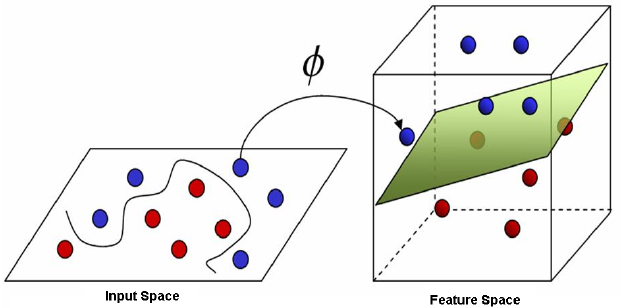

In [1]:
# https://www.researchgate.net/figure/260283043_fig13_Figure-A15-The-non-linear-SVM-classifier-with-the-kernel-trick
def plotSVM():
    from IPython.display import Image, display
    display(Image('svm.png'))
    
plotSVM()

In [ ]:
# Support Vector Machines: these are algorithms that project the data to a different plane before finding a match
# C is the penalty parameter, decreasing C increases regularization
def ex5():

    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVR
    import numpy as np
    
    scaler = MinMaxScaler()
    (X_crime,y_crime) = get_crime_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                       random_state = 0)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = SVR(C=10, kernel='linear').fit(X_train_scaled, y_train)
    r2_train = clf.score(X_train_scaled, y_train)
    r2_test = clf.score(X_test_scaled, y_test)
    print(r2_train,r2_test)

ex5()

In [ ]:
# The prior example was underfitting, 
# in order to improve our solution when underfitting in SVRs we increase C (decrease regularization)
# We are going to use GridSearchCV to run SVR with different parameters
# notice that the higher the parameter C (less normalization), the better the prediction
def ex6():

    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVR
    import numpy as np
    
    scaler = MinMaxScaler()
    (X_crime,y_crime) = get_crime_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                       random_state = 0)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # we use GridSearchCV on the train data to find the best parameters
    svr = GridSearchCV(SVR( gamma=.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3, 1e4], 'kernel':['rbf','linear','poly']})
    
    clf = svr.fit(X_train_scaled, y_train)
    print(clf.best_params_)
    r2_train = clf.score(X_train_scaled, y_train)
    r2_test = clf.score(X_test_scaled, y_test)
    print(r2_train,r2_test)

ex6()

In [ ]:
# we use TreeRegressor to identify the features that are most important
# change the max_depth to 1 through 4 and see how the importance of each feature changes
def ex7():
    
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import train_test_split
    
    scaler = MinMaxScaler()
    depth = 2
    (X_crime,y_crime) = get_crime_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                       random_state = 0)
    # both training set and testing set need to be scaled
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=depth).fit(X_train_scaled, y_train)
    print(tree.feature_importances_)
    returnColumnNames()
    return (tree.score(X_train_scaled, y_train),tree.score(X_test_scaled, y_test))

ex7()

In [ ]:
# The features for predicting burglPerPop used in this exercise were selected to show some of the
# algorithms and techniques you can use to solve Regression problems. 
# They were not chosen to do an accurate prediction
# now it's your turn:
# try to predict 'ViolentCrimesPerPop' or 'nonViolPerPop' using some of the features available in this dataset
# try to get a r2 score > 0.7 for the testing set.
# (follow the rules at the top to improve undefitting and avoid overfitting )
# pick whatever algorithm you would like, but you must use GridSearchCV to find the optimal one
# what are the most important features? (use TreeRegressor)
# Note: please don't be offended if a classmate determines that a relationship between race, or other indicator
# and crime exists

def classExercise():
    
    return "solution"

classExercise()